# Predicting the water temperature based on salinity

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
csv = pd.read_csv("/content/drive/Othercomputers/My Laptop/college/Final Year Project/ML Project/Project/bottle.csv")
csv.head(-1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864857,34403,864858,093.3 120.0,20-1611SR-MX-313-2053-09331200-0521A-3,521,5.818,34.2382,0.366,26.98477,5.23,...,NaN,525,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,...,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,...,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,...,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
csv.shape

(864863, 74)

In [7]:
csv.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [8]:
data=csv.dropna(axis=1,thresh=800000)

In [9]:
data.shape

(864863, 24)

In [10]:
data=data[:][:5000]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cst_Cnt     5000 non-null   int64  
 1   Btl_Cnt     5000 non-null   int64  
 2   Sta_ID      5000 non-null   object 
 3   Depth_ID    5000 non-null   object 
 4   Depthm      5000 non-null   int64  
 5   T_degC      4980 non-null   float64
 6   Salnty      4848 non-null   float64
 7   STheta      4833 non-null   float64
 8   RecInd      5000 non-null   int64  
 9   T_prec      4980 non-null   float64
 10  S_prec      4848 non-null   float64
 11  NH3q        5000 non-null   float64
 12  C14A1q      5000 non-null   float64
 13  C14A2q      5000 non-null   float64
 14  DarkAq      5000 non-null   float64
 15  MeanAq      5000 non-null   float64
 16  R_Depth     5000 non-null   float64
 17  R_TEMP      4980 non-null   float64
 18  R_POTEMP    4775 non-null   float64
 19  R_SALINITY  4848 non-null  

In [12]:
data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
count,5000.000000,5000.000000,5000.000000,4980.000000,4848.000000,4833.000000,5000.000000,4980.000000,4848.000000,5000.0,...,5000.0,5000.0,5000.000000,4980.000000,4775.000000,4848.000000,4719.000000,4719.000000,4786.000000,5000.000000
mean,82.129400,2500.500000,347.985200,8.974335,33.828065,26.122933,5.312000,1.987952,2.571576,9.0,...,9.0,9.0,347.985200,8.974335,9.004084,33.828065,26.120341,192.307163,0.587048,350.541800
std,47.348975,1443.520003,358.279702,3.911270,0.495340,0.922848,1.975712,0.145411,0.494901,0.0,...,0.0,0.0,358.279702,3.911270,3.882991,0.495340,0.921310,84.548967,0.483150,361.426299
min,1.000000,1.000000,0.000000,2.700000,32.520000,23.568000,3.000000,1.000000,2.000000,9.0,...,9.0,9.0,0.000000,2.700000,2.590000,32.520000,24.510000,60.200000,0.000000,0.000000
25%,41.000000,1250.750000,55.000000,5.387500,33.494000,25.117000,3.000000,2.000000,2.000000,9.0,...,9.0,9.0,55.000000,5.387500,5.510000,33.494000,25.120000,111.850000,0.150000,55.000000
50%,82.000000,2500.500000,200.000000,8.610000,33.890000,26.282000,7.000000,2.000000,3.000000,9.0,...,9.0,9.0,200.000000,8.610000,8.700000,33.890000,26.280000,176.100000,0.460000,201.000000
75%,123.000000,3750.250000,600.000000,12.150000,34.260000,27.001000,7.000000,2.000000,3.000000,9.0,...,9.0,9.0,600.000000,12.150000,12.180000,34.260000,27.000000,284.500000,0.980000,604.000000
max,165.000000,5000.000000,1547.000000,19.760000,34.700000,27.623000,7.000000,3.000000,3.000000,9.0,...,9.0,9.0,1547.000000,19.760000,17.100000,34.700000,27.570000,341.100000,1.950000,1563.000000


## Simple Linear Regression

In [13]:
data.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Cst_Cnt,1.000000,0.999937,0.007634,0.077537,0.150000,0.005562,-0.007681,0.055146,-0.015063,NaN,...,NaN,NaN,0.007634,0.077537,0.067625,0.150000,0.007872,-0.006407,0.008547,0.007567
Btl_Cnt,0.999937,1.000000,0.013444,0.070903,0.154147,0.011766,-0.006470,0.056079,-0.013968,NaN,...,NaN,NaN,0.013444,0.070903,0.061053,0.154147,0.014076,-0.012614,0.014407,0.013378
Depthm,0.007634,0.013444,1.000000,-0.849183,0.774868,0.875204,0.160508,0.097940,0.140458,NaN,...,NaN,NaN,1.000000,-0.849183,-0.849958,0.774868,0.878752,-0.873567,0.973526,0.999999
T_degC,0.077537,0.070903,-0.849183,1.000000,-0.638175,-0.957094,-0.166585,-0.113551,-0.154793,NaN,...,NaN,NaN,-0.849183,1.000000,0.999994,-0.638175,-0.958130,0.959329,-0.871005,-0.848997
Salnty,0.150000,0.154147,0.774868,-0.638175,1.000000,0.828480,0.135321,0.128487,0.135321,NaN,...,NaN,NaN,0.774868,-0.638175,-0.648870,1.000000,0.834787,-0.831272,0.818351,0.774540
STheta,0.005562,0.011766,0.875204,-0.957094,0.828480,1.000000,0.163048,0.134696,0.163048,NaN,...,NaN,NaN,0.875204,-0.957094,-0.958465,0.828480,0.999995,-0.999889,0.918030,0.874916
RecInd,-0.007681,-0.006470,0.160508,-0.166585,0.135321,0.163048,1.000000,0.153237,1.000000,NaN,...,NaN,NaN,0.160508,-0.166585,-0.158224,0.135321,0.165634,-0.164807,0.175638,0.160409
T_prec,0.055146,0.056079,0.097940,-0.113551,0.128487,0.134696,0.153237,1.000000,0.151919,NaN,...,NaN,NaN,0.097940,-0.113551,-0.114735,0.128487,0.134692,-0.133965,0.130232,0.097778
S_prec,-0.015063,-0.013968,0.140458,-0.154793,0.135321,0.163048,1.000000,0.151919,1.000000,NaN,...,NaN,NaN,0.140458,-0.154793,-0.156543,0.135321,0.165634,-0.164807,0.171577,0.140317
NH3q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Extracting required Columns
df=data[['T_degC','Depthm']]
df.columns = ['Temperature', 'Depth']
df.head()

,Temperature,Depth
0,10.50,0
1,10.46,8
2,10.46,10
3,10.45,19
4,10.45,20


In [15]:
df.shape

(5000, 2)

In [16]:
#Checking for null values
df.isnull().sum()

Temperature    20
Depth           0
dtype: int64

In [17]:
df=df.dropna()

In [18]:
#Finding relation between values
df.corr()

,Temperature,Depth
Temperature,1.000000,-0.849183
Depth,-0.849183,1.000000


In [19]:
df.describe()

,Temperature,Depth
count,4980.000000,4980.000000
mean,8.974335,347.948394
std,3.911270,357.881635
min,2.700000,0.000000
25%,5.387500,57.000000
50%,8.610000,200.000000
75%,12.150000,600.000000
max,19.760000,1547.000000


In [20]:
#Splitting the dataset
X = np.array(df['Depth']).reshape(-1, 1)
y = np.array(df['Temperature']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [21]:
#Training the Model
from sklearn.linear_model import LinearRegression

Model=LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

In [22]:
#Testing and checking accuracy the model
Predict=Model.predict(X_test)
score_slr=Model.score(X_test,y_test)
print("Simple Linear Regression Model Score: " ,score_slr*100)

Simple Linear Regression Model Score:  72.04505325357827


In [23]:
#R2 Score
from sklearn.metrics import mean_squared_error,r2_score
print("R2 Score: " +"{:.3}".format(r2_score(y_test, Predict)));

R2 Score: 0.72


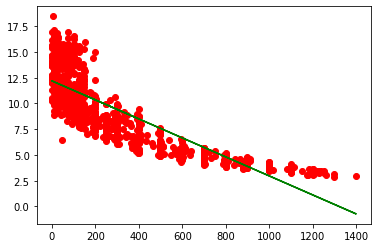

In [24]:
#Figure of Simple Linear Regression Model
plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, Predict, color='g')
plt.show()

## Multiple Linear Regression

In [25]:
#Finding correlation between attributes
data.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Cst_Cnt,1.000000,0.999937,0.007634,0.077537,0.150000,0.005562,-0.007681,0.055146,-0.015063,NaN,...,NaN,NaN,0.007634,0.077537,0.067625,0.150000,0.007872,-0.006407,0.008547,0.007567
Btl_Cnt,0.999937,1.000000,0.013444,0.070903,0.154147,0.011766,-0.006470,0.056079,-0.013968,NaN,...,NaN,NaN,0.013444,0.070903,0.061053,0.154147,0.014076,-0.012614,0.014407,0.013378
Depthm,0.007634,0.013444,1.000000,-0.849183,0.774868,0.875204,0.160508,0.097940,0.140458,NaN,...,NaN,NaN,1.000000,-0.849183,-0.849958,0.774868,0.878752,-0.873567,0.973526,0.999999
T_degC,0.077537,0.070903,-0.849183,1.000000,-0.638175,-0.957094,-0.166585,-0.113551,-0.154793,NaN,...,NaN,NaN,-0.849183,1.000000,0.999994,-0.638175,-0.958130,0.959329,-0.871005,-0.848997
Salnty,0.150000,0.154147,0.774868,-0.638175,1.000000,0.828480,0.135321,0.128487,0.135321,NaN,...,NaN,NaN,0.774868,-0.638175,-0.648870,1.000000,0.834787,-0.831272,0.818351,0.774540
STheta,0.005562,0.011766,0.875204,-0.957094,0.828480,1.000000,0.163048,0.134696,0.163048,NaN,...,NaN,NaN,0.875204,-0.957094,-0.958465,0.828480,0.999995,-0.999889,0.918030,0.874916
RecInd,-0.007681,-0.006470,0.160508,-0.166585,0.135321,0.163048,1.000000,0.153237,1.000000,NaN,...,NaN,NaN,0.160508,-0.166585,-0.158224,0.135321,0.165634,-0.164807,0.175638,0.160409
T_prec,0.055146,0.056079,0.097940,-0.113551,0.128487,0.134696,0.153237,1.000000,0.151919,NaN,...,NaN,NaN,0.097940,-0.113551,-0.114735,0.128487,0.134692,-0.133965,0.130232,0.097778
S_prec,-0.015063,-0.013968,0.140458,-0.154793,0.135321,0.163048,1.000000,0.151919,1.000000,NaN,...,NaN,NaN,0.140458,-0.154793,-0.156543,0.135321,0.165634,-0.164807,0.171577,0.140317
NH3q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Extracting required Columns with pearson coefficient>0.5 and pearson coefficient<-0.5
df2=data[['R_SIGMA','STheta','R_DYNHT','Depthm','R_Depth','R_PRES','R_SVA','T_degC']]

In [27]:
#Cheking null values
df2.isnull().sum()

R_SIGMA    281
STheta     167
R_DYNHT    214
Depthm       0
R_Depth      0
R_PRES       0
R_SVA      281
T_degC      20
dtype: int64

In [28]:
#Dropping null values
df2=df2.dropna()

In [29]:
#Splitting the dataset
X=df2.drop('T_degC',axis=1)
Y=df2[['T_degC']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [30]:
#Training the model
Model2 = LinearRegression()
Model2.fit(X_train, y_train)

LinearRegression()

In [31]:
#Testing and cheking the accuracy
Predict=Model2.predict(X_test)

score_mlr=Model2.score(X_test,y_test)
print("Multiple Linear Regression Model Score: " ,score_mlr*100)

Multiple Linear Regression Model Score:  93.6306079607819


In [32]:
#R2 Score
print("R2 Score: " +"{:.3}".format(r2_score(y_test, Predict)));

R2 Score: 0.936


## Polynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures

Model3 = PolynomialFeatures(degree = 4)
trans_Model3 = Model3.fit_transform(X_train)

lin_reg_2 =LinearRegression()  
lin_reg_2.fit(trans_Model3,y_train)

Polynomial_predict = lin_reg_2.predict(trans_Model3)


In [34]:
rmse = np.sqrt(mean_squared_error(y_train,Polynomial_predict))
r2 = r2_score(y_train,Polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.46
R2 Score for Test set: 0.99
